In [1]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [2]:
# Load Datasets

cust_demo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', header=1)

cust_add = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', header=1)

transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', header=1)

In [3]:
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [4]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

Customer Demographic Dataset issues

- Column names are not consistent , so changed them
- Gender had inconsistent values (U: unspecified,F:Female)
- DOB has object type instead of datetime , so changed it to Datetime datatype
- take a look at the 'default' column as it has invalid values
- remove 'default' column
- job industry column had some missing values , impute them with values relevant to the job title
- job title column had some missing values , impute them with the mode of job titles w.r.t a particular industry
- Check for duplicates (no duplicates found)

In [7]:
cust_demo.rename(columns={'past_3_years_bike_related_purchases': '3_years_purchase','job_industry_category':'job_industry','deceased_indicator':'deceased'}, inplace=True)

## Data Cleaning

In [8]:
null_values = (cust_demo.isnull().sum()/cust_demo.shape[0])*100
print('\tPercentage of Null Values in Each Column \n\n',null_values)

	Percentage of Null Values in Each Column 

 customer_id          0.000
first_name           0.000
last_name            3.125
gender               0.000
3_years_purchase     0.000
DOB                  2.175
job_title           12.650
job_industry        16.400
wealth_segment       0.000
deceased             0.000
default              7.550
owns_car             0.000
tenure               2.175
dtype: float64


In [9]:
# Drop the missing values

cust_demo['last_name'].dropna(inplace=True)

In [10]:
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

Gender column has some inconsistent values and we need to replace those values

In [11]:
cust_demo['gender'].replace({'Femal': 'Female', 'F': 'Female', 'M': 'Male','U':'Unspecified'}, inplace=True)

In [12]:
cust_demo['gender'].value_counts()

gender
Female         2039
Male           1873
Unspecified      88
Name: count, dtype: int64

In [13]:
# DOB column has object datatype, convert it to datetime

# Getting only the date from the DOB column

cust_demo['DOB'] = cust_demo['DOB'].astype('datetime64[ns]')

In [14]:
cust_demo.head()

,customer_id,first_name,last_name,gender,3_years_purchase,DOB,job_title,job_industry,wealth_segment,deceased,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [15]:
# drop unwanted columns

cust_demo.drop(['default'], axis=1, inplace=True)

In [16]:
# check for duplicates 

cust_demo.duplicated().sum()

0

Dealing with Missing values in job_industry column

In [17]:
# Some of the customers records don't have both job_title and job_industry_category, so we can drop those records

cust_demo.dropna(subset=['job_title','job_industry'], inplace=True,how='all')

In [18]:
job_title_to_industry = cust_demo.groupby('job_title')['job_industry'].first().to_dict()

In [19]:
cust_demo['job_industry'].fillna(cust_demo['job_title'].map(job_title_to_industry), inplace=True)

Dealing with Missing values in job_title column

In [20]:
# Finding the mode of job_title for each job_industry

most_common_titles = cust_demo.groupby('job_industry')['job_title'].apply(lambda x: x.mode().iloc[0] if not x.empty else None)

# Define a function to impute missing 'job_title' values based on industry
def impute_job_title(row):
    if pd.isnull(row['job_title']):
        return most_common_titles.get(row['job_industry'], None)
    else:
        return row['job_title']


In [21]:
# Apply the imputation function to fill missing job_title values

cust_demo['job_title'] = cust_demo.apply(impute_job_title, axis=1)

### Outliers

In [22]:
cust_demo.describe().T

,count,mean,min,25%,50%,75%,max,std
customer_id,3895.0,1997.182028,1.0,1000.5,1993.0,2991.5,4000.0,1153.258227
3_years_purchase,3895.0,48.959692,0.0,24.0,48.0,73.0,99.0,28.743489
DOB,3808,1977-07-19 22:32:16.134453792,1843-12-21 00:00:00,1968-01-25 00:00:00,1977-07-30 12:00:00,1987-03-04 06:00:00,2002-03-11 00:00:00,NaN
tenure,3808.0,10.681197,1.0,6.0,11.0,15.0,22.0,5.668613


In [23]:
# Check for outliers

def outliers(col):
    df = col
    df_Q1 = df.quantile(0.25)
    df_Q3 = df.quantile(0.75)
    df_IQR = df_Q3 - df_Q1
    df_lowerend = df_Q1 - (1.5 * df_IQR)
    df_upperend = df_Q3 + (1.5 * df_IQR)

    df_outliers = df[(df < df_lowerend) | (df > df_upperend)]
    return df_outliers

In [24]:
# Customer at index 33 has DOB of 1843-12-21, which is an outlier
# Correcting the DOB of customer at index 33

cust_demo.at[33,'DOB'] = np.datetime64('1943-12-21')

In [25]:
cust_demo['age'] = cust_demo['DOB'].apply(lambda x: 2017 - x.year)
cust_demo.drop(columns='DOB',inplace=True)

In [26]:
cust_demo.describe()

,customer_id,3_years_purchase,tenure,age
count,3895.000000,3895.000000,3808.000000,3808.000000
mean,1997.182028,48.959692,10.681197,39.924895
std,1153.258227,28.743489,5.668613,12.633490
min,1.000000,0.000000,1.000000,15.000000
25%,1000.500000,24.000000,6.000000,30.000000
50%,1993.000000,48.000000,11.000000,40.000000
75%,2991.500000,73.000000,15.000000,49.000000
max,4000.000000,99.000000,22.000000,86.000000


In [27]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

## TASK 2

In [28]:
# Merge Datasets 

cust_demo_add = pd.merge(cust_demo, cust_add, on='customer_id', how='left')
merged = pd.merge(cust_demo_add, transactions, on='customer_id', how='left')

In [29]:
merged.shape

(19994, 29)

In [30]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              19994 non-null  int64         
 1   first_name               19994 non-null  object        
 2   last_name                19370 non-null  object        
 3   gender                   19994 non-null  object        
 4   3_years_purchase         19994 non-null  int64         
 5   job_title                19994 non-null  object        
 6   job_industry             19994 non-null  object        
 7   wealth_segment           19994 non-null  object        
 8   deceased                 19994 non-null  object        
 9   owns_car                 19994 non-null  object        
 10  tenure                   19537 non-null  float64       
 11  age                      19537 non-null  float64       
 12  address                  19972 n

In [31]:
merged.describe().T

,count,mean,min,25%,50%,75%,max,std
customer_id,19994.0,1782.751125,1.0,880.0,1773.0,2670.0,4000.0,1045.328623
3_years_purchase,19994.0,48.907372,0.0,24.0,48.0,73.0,99.0,28.650616
tenure,19537.0,10.703281,1.0,6.0,11.0,16.0,22.0,5.679697
age,19537.0,39.901878,15.0,30.0,40.0,49.0,86.0,12.654825
postcode,19972.0,2985.340527,2000.0,2200.0,2767.0,3750.0,4883.0,848.641694
property_valuation,19972.0,7.516523,1.0,6.0,8.0,10.0,12.0,2.82527
transaction_id,19504.0,10001.598134,1.0,4992.75,9993.5,15008.25,20000.0,5777.427726
product_id,19504.0,45.343622,0.0,18.0,44.0,72.0,100.0,30.736487
transaction_date,19504,2017-07-01 09:35:13.043478272,2017-01-01 00:00:00,2017-04-01 00:00:00,2017-07-02 00:00:00,2017-10-02 00:00:00,2017-12-30 00:00:00,NaN
online_order,19154.0,0.502297,0.0,0.0,1.0,1.0,1.0,0.500008


In [32]:
# Extract Month and Year columns from transaction_date column

merged['month'] = merged['transaction_date'].dt.month_name()
merged['year'] = merged['transaction_date'].dt.year

In [33]:
# Column Age

outliers(merged['age']) # No Outliers

4118    86.0
4119    86.0
4120    86.0
4121    86.0
4122    86.0
4123    86.0
4124    86.0
4125    86.0
4126    86.0
4127    86.0
6210    82.0
6211    82.0
6212    82.0
6213    82.0
6214    82.0
Name: age, dtype: float64

In [37]:
# Column 3_years_purchase

outliers(merged['3_years_purchase']) # No Outliers

Series([], Name: 3_years_purchase, dtype: int64)

In [38]:
# Column postcode

outliers(merged['postcode']) # No Outliers

Series([], Name: postcode, dtype: float64)

In [40]:
# Column property_valuation

outliers(merged['property_valuation']) # No Outliers

Series([], Name: property_valuation, dtype: float64)

In [42]:
numerical_cols = merged.select_dtypes(include=['int64','float64']).columns

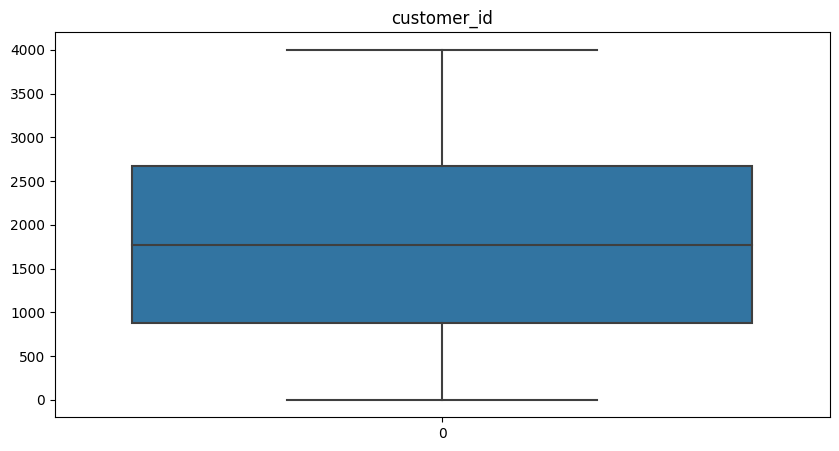

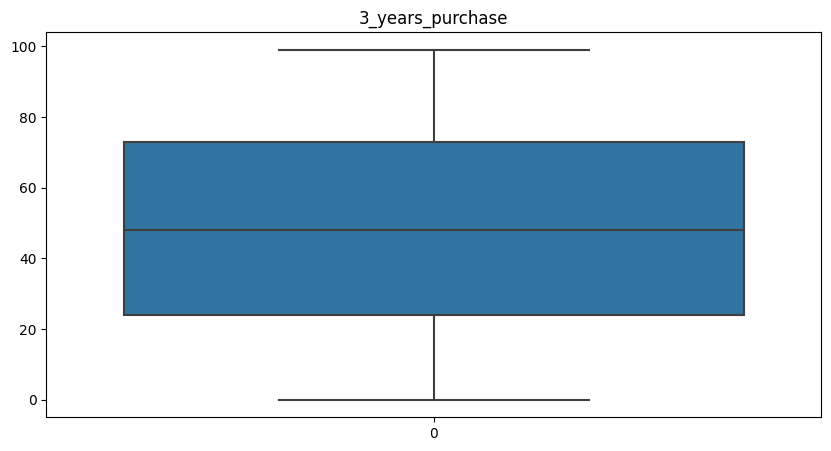

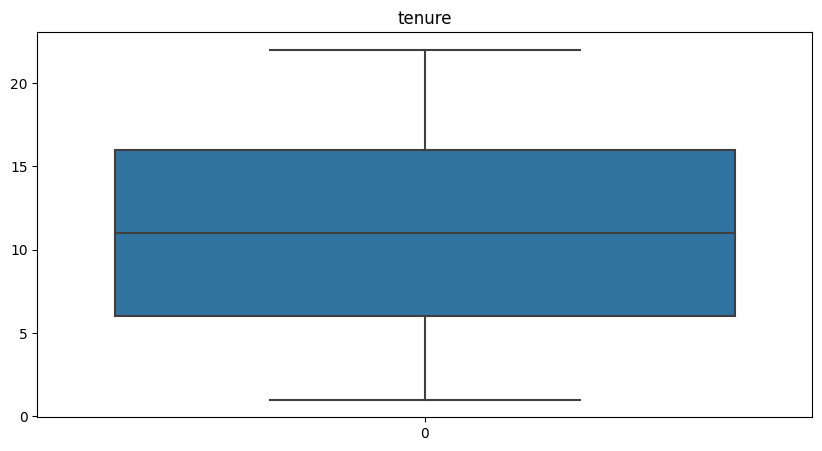

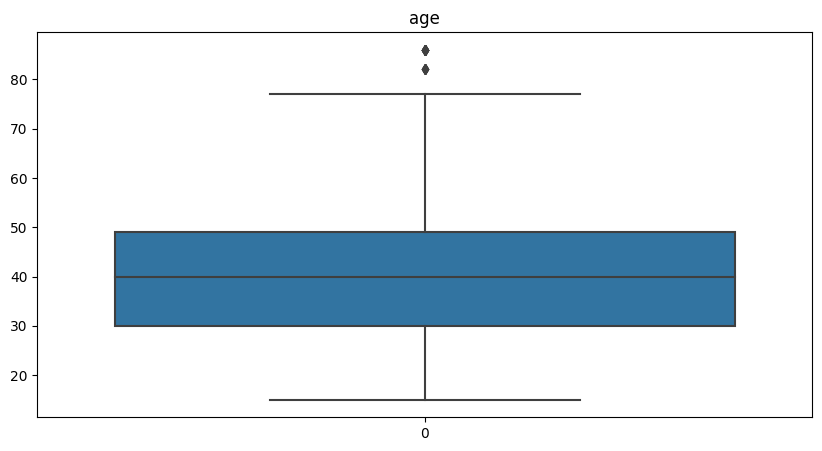

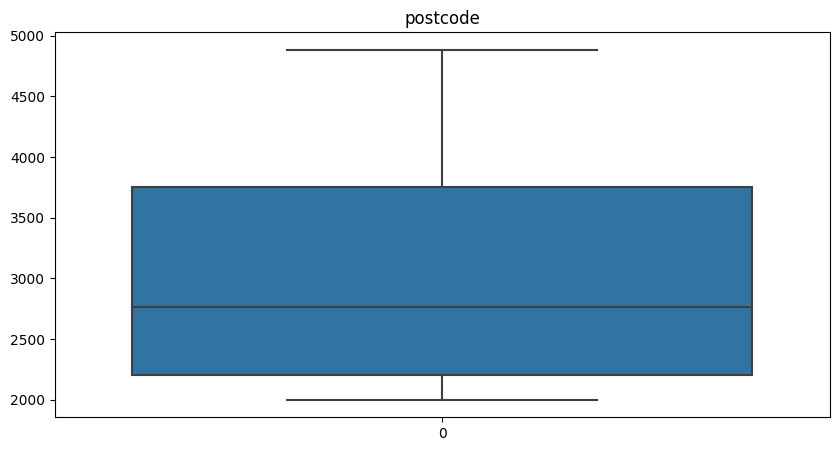

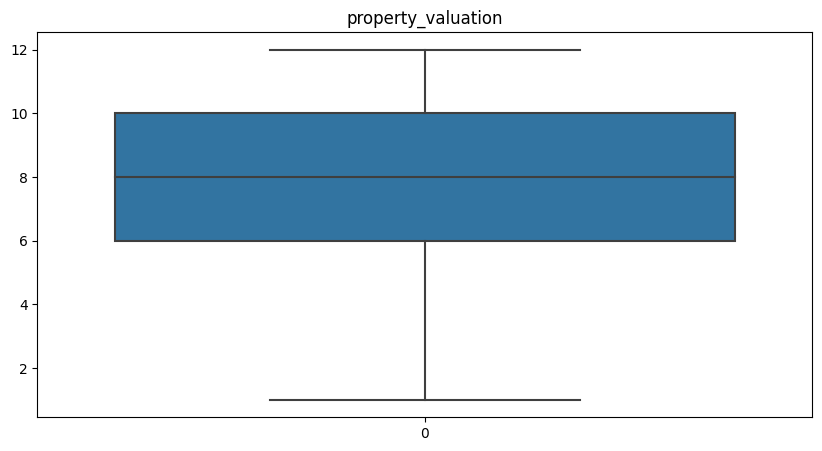

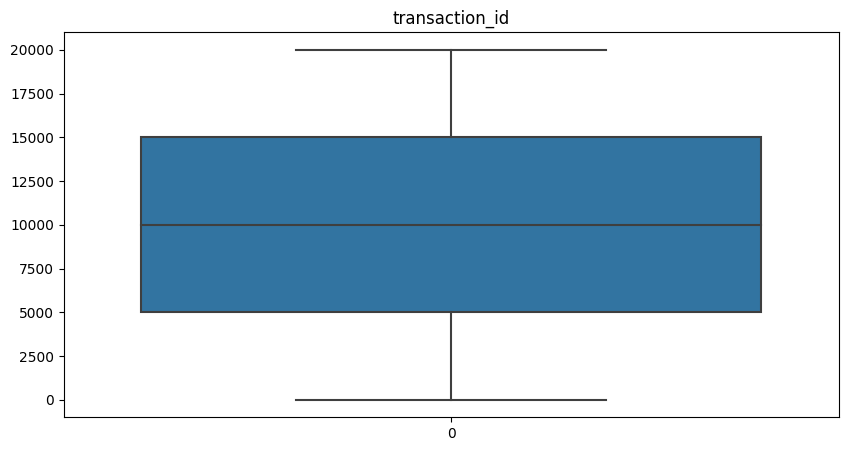

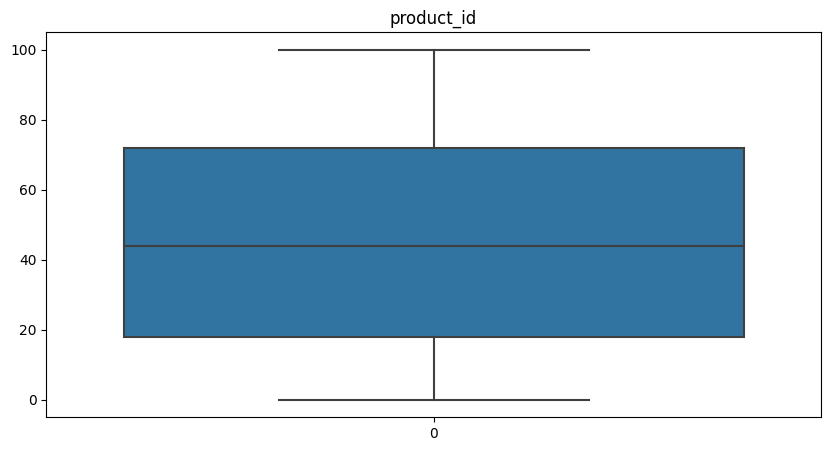

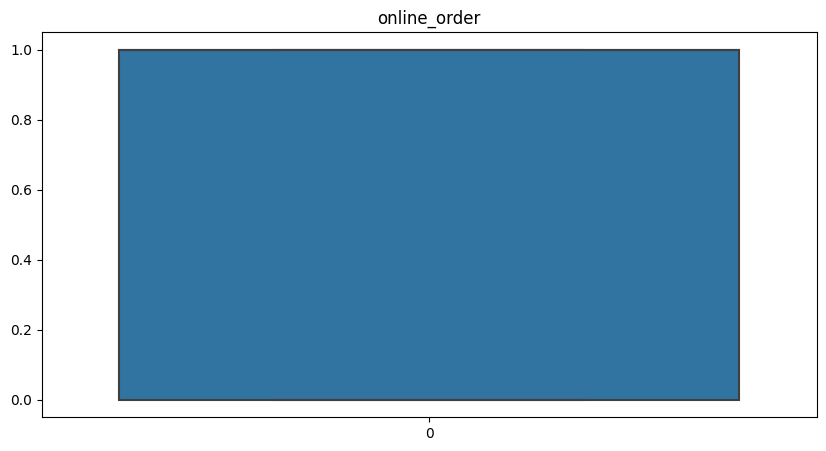

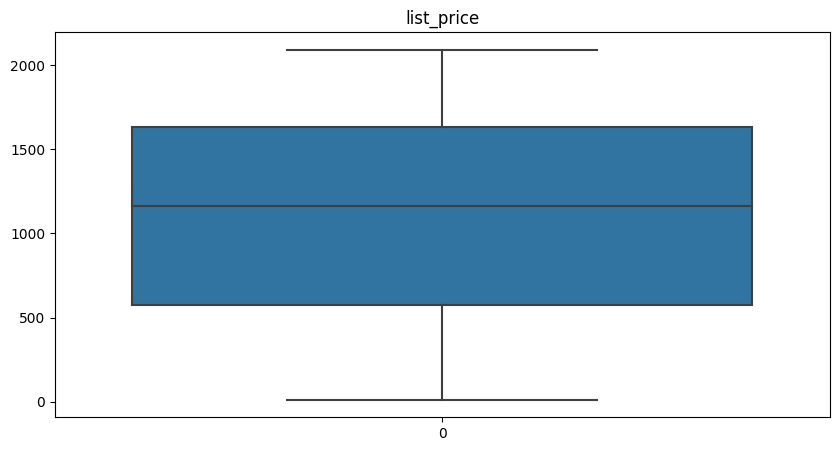

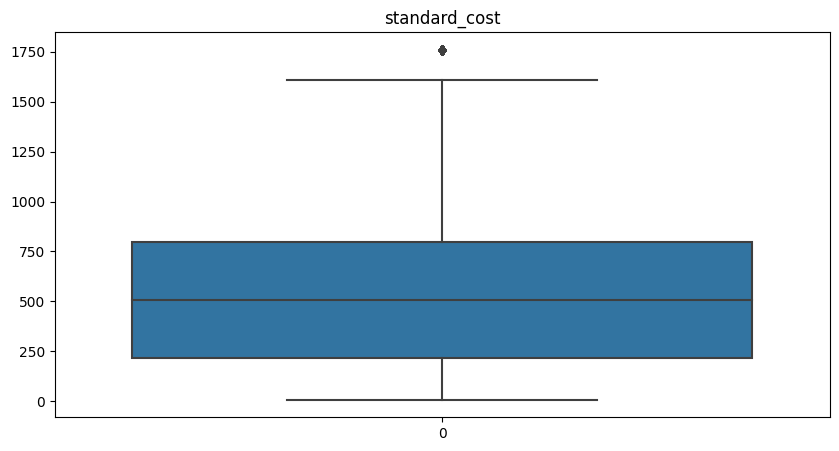

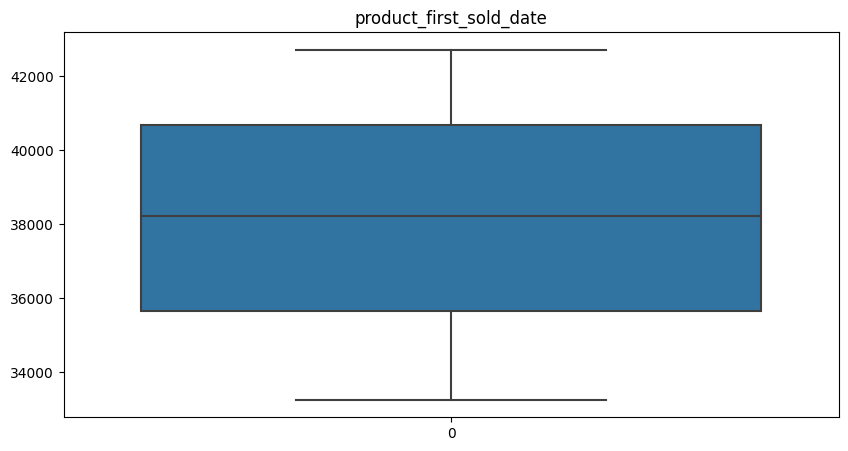

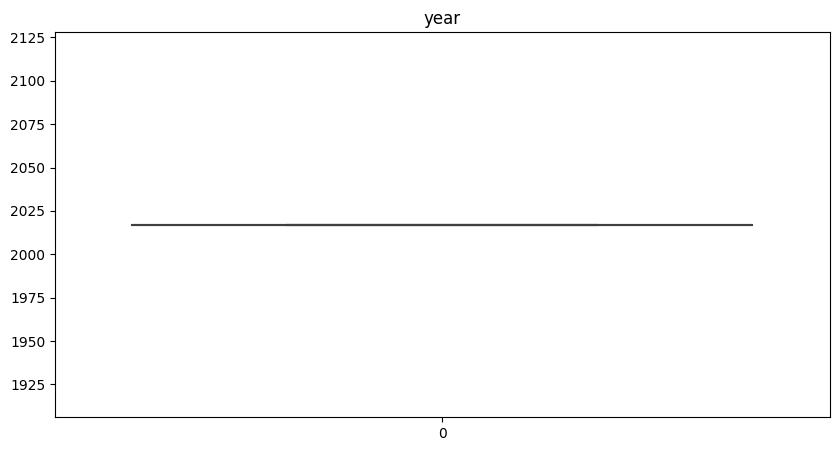

In [43]:
for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(merged[col])
    plt.title(col)
    plt.show()

In [45]:
# Seems there are few outliers in the Standard_cost column

outliers(merged['standard_cost'])

197      1759.85
218      1759.85
325      1759.85
763      1759.85
776      1759.85
          ...   
19274    1759.85
19349    1759.85
19372    1759.85
19391    1759.85
19427    1759.85
Name: standard_cost, Length: 192, dtype: float64

the standard_cost column doesn't have any outliers as the values are in the range of 0 to 1759 , 1759 being the price of a bicycle

## Exploratory Data Analysis

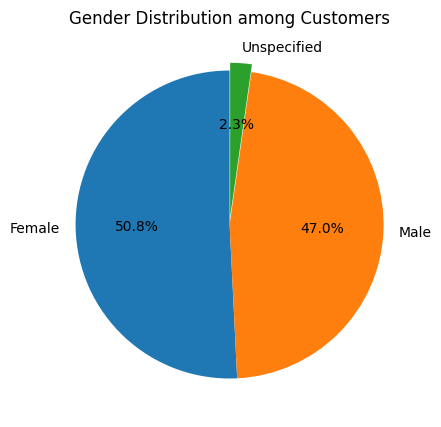

In [74]:
# What is the distribution of gender among the Customers

gender = cust_demo['gender'].value_counts().reset_index()

plt.figure(figsize=(10,5))
plt.pie(x=gender['count'],labels=['Female','Male','Unspecified'],autopct='%1.1f%%',explode=(0,0,0.05),startangle=90)
plt.title("Gender Distribution among Customers")
plt.show()

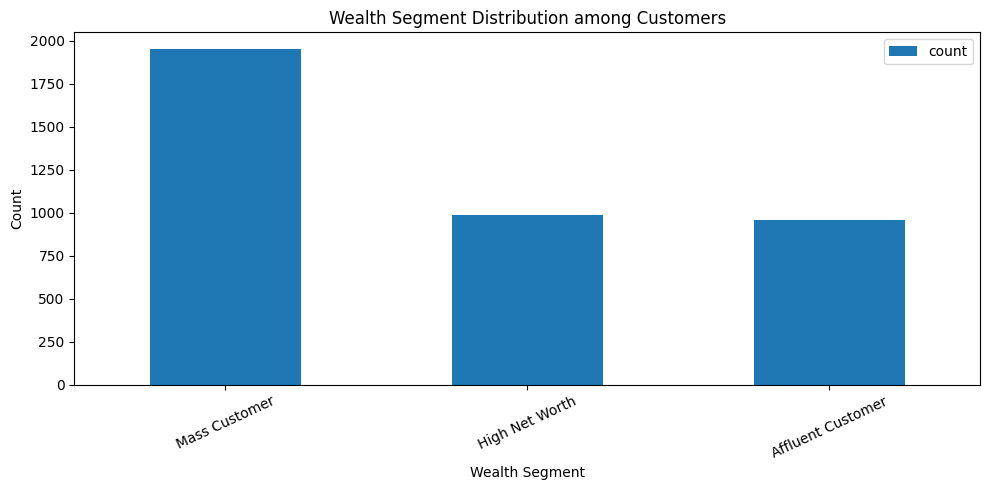

In [153]:
# How does wealth segment vary among the customers?

wealth = cust_demo['wealth_segment'].value_counts().reset_index()

wealth.plot(kind='bar',x='wealth_segment',y='count',figsize=(10,5))
plt.title("Wealth Segment Distribution among Customers")
plt.xticks(rotation=25)
plt.xlabel("Wealth Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

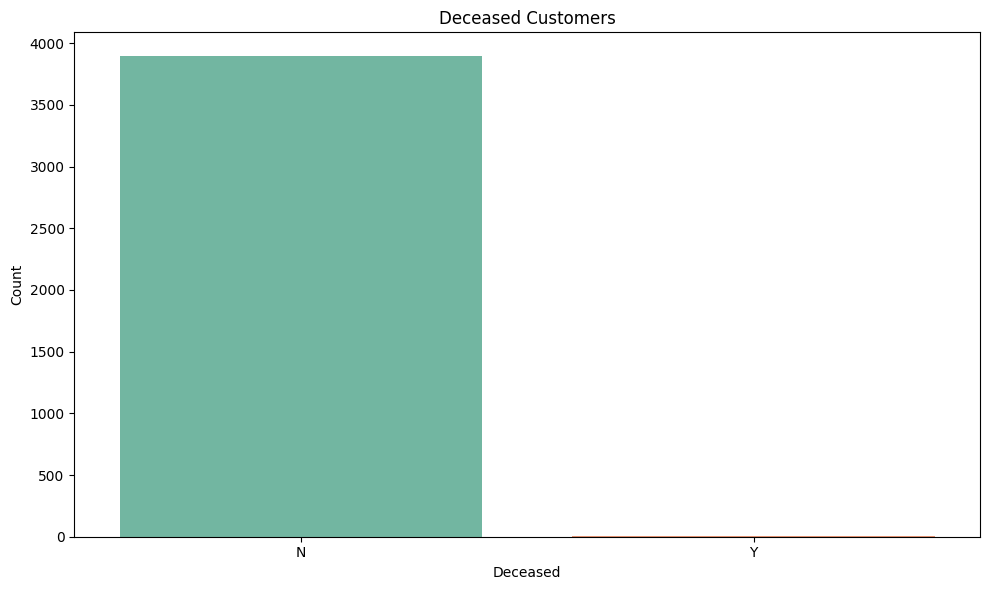

In [152]:
# Are there any deceased customers in the dataset, and if so, what is their distribution?

deceased = cust_demo['deceased'].value_counts().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x=deceased['deceased'],y=deceased['count'],palette='Set2')
plt.title("Deceased Customers")
plt.xlabel("Deceased")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


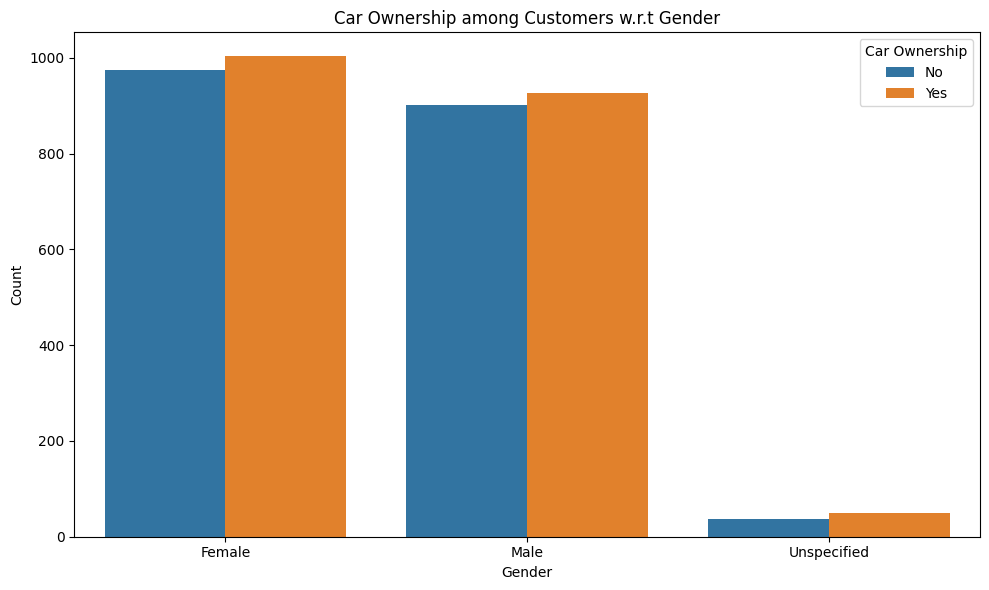

In [151]:
# How many customers own cars, and how does car ownership relate to other factors like gender?

car_ownership = cust_demo.groupby(['gender','owns_car'])['customer_id'].count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data = car_ownership, x='gender',y='customer_id',hue='owns_car')
plt.title("Car Ownership among Customers w.r.t Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Car Ownership')
plt.tight_layout()
plt.show()

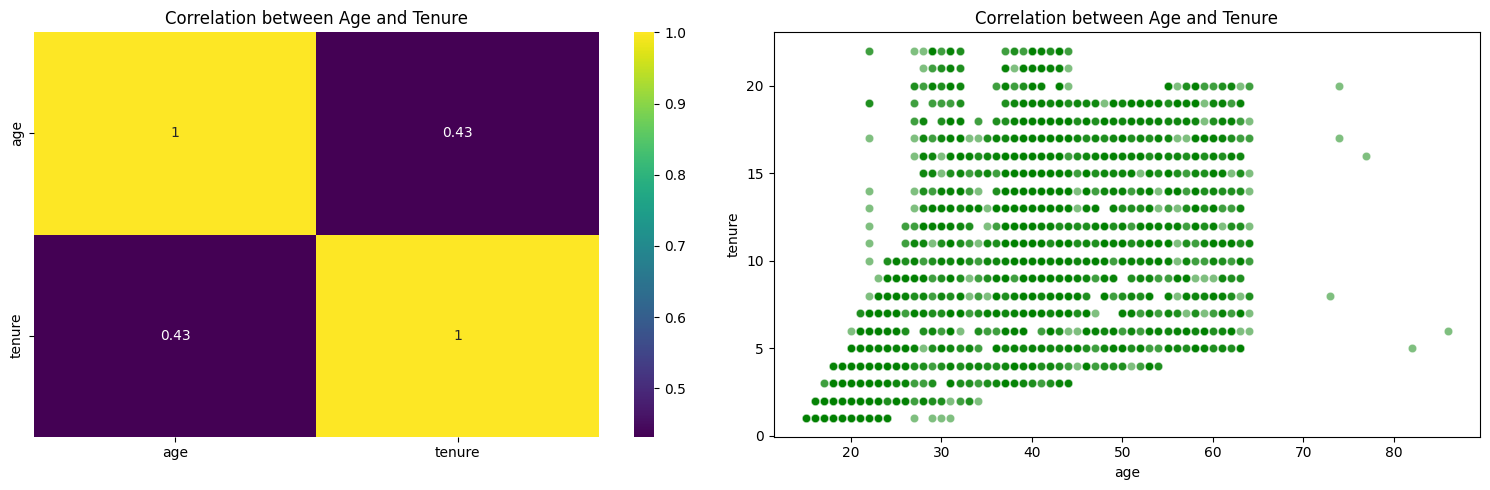

In [150]:
# is there any correlation between age and tenure?

fig , axes = plt.subplots(1,2,figsize=(15,5))

# HeatMap for Age and Tenure
sns.heatmap(cust_demo[['age','tenure']].corr(),annot=True,cmap='viridis',ax=axes[0])
axes[0].set_title("Correlation between Age and Tenure")

# Scatter plot for AGE and TENURE
sns.scatterplot(x='age',y='tenure',data=cust_demo,c='g',alpha=0.5,ax=axes[1])
axes[1].set_title("Correlation between Age and Tenure")
plt.tight_layout()
plt.show()

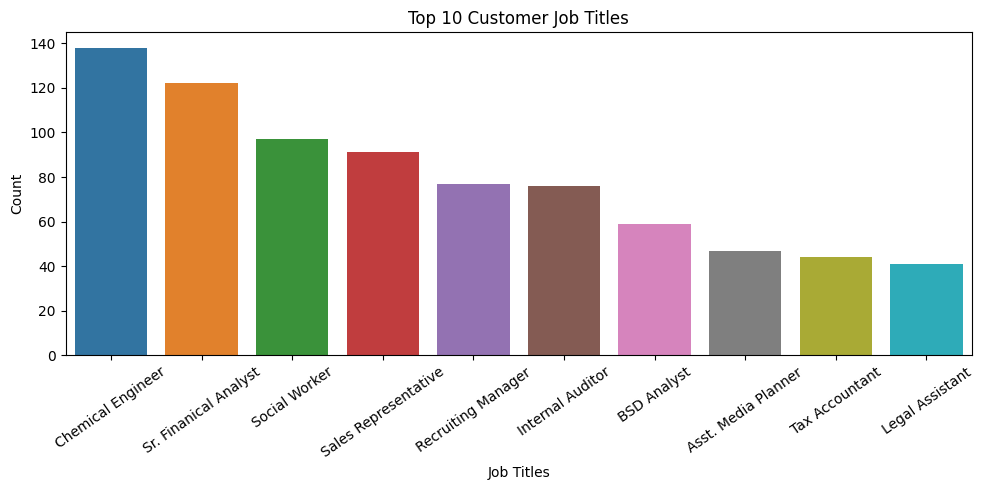

In [154]:
# What are the most common job titles among the customers?

job_titles = cust_demo['job_title'].value_counts().reset_index().head(10)

titles = job_titles['job_title'].replace({'Business Systems Development Analyst':'BSD Analyst','Assistant Media Planner':'Asst. Media Planner','Senior Financial Analyst':'Sr. Finanical Analyst'})

plt.figure(figsize=(10,5))
sns.barplot(x=titles,y=job_titles['count'])
plt.title("Top 10 Customer Job Titles")
plt.xlabel("Job Titles")
plt.ylabel("Count")
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

In [165]:
states

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

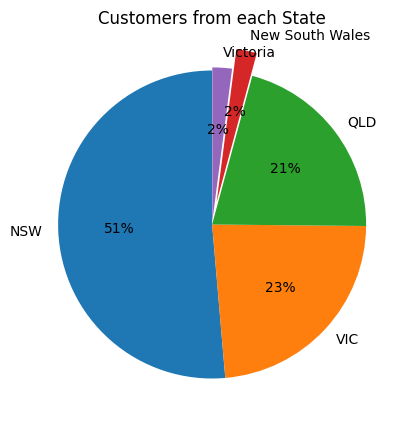

In [176]:
# Which states or countries have the highest number of customers?

states = cust_add['state'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(x=states.values,labels=states.index,autopct='%1.0f%%',explode=(0,0,0,0.15,0.02),startangle=90)
plt.title("Customers from each State")
plt.show()

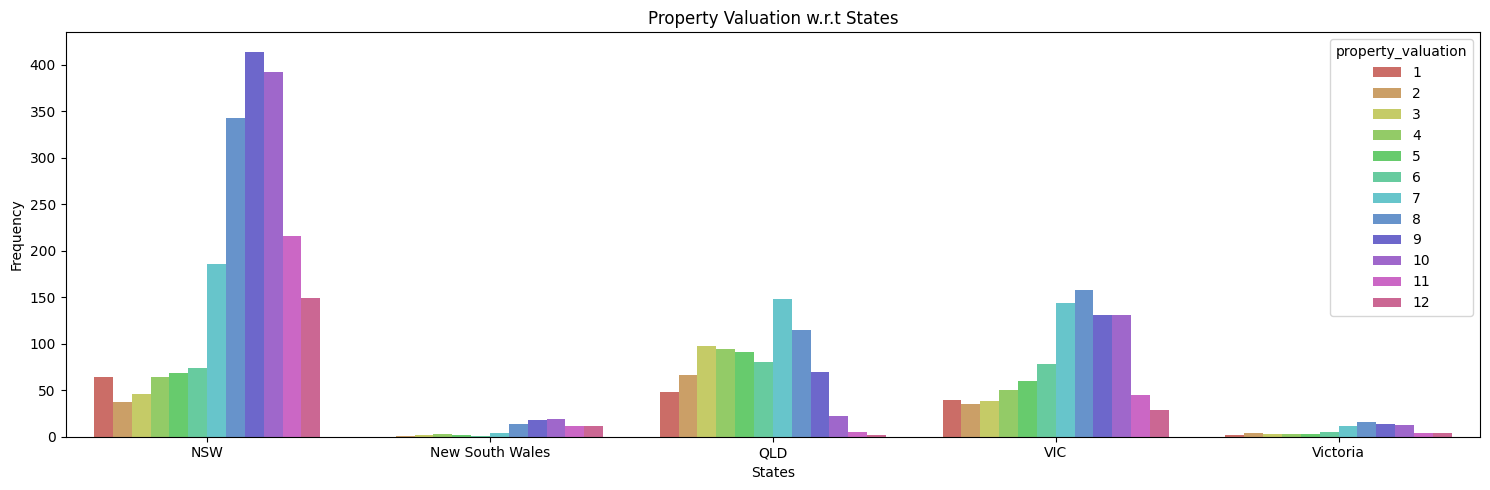

In [201]:
# What is the distribution of property valuations among customers in different locations?

state_property = cust_add.groupby('state')['property_valuation'].value_counts().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(data = state_property , x = 'state',y='count',hue='property_valuation',palette="hls")
plt.title("Property Valuation w.r.t States")
plt.xlabel("States")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()